In [41]:
%matplotlib inline

import ipywidgets as w
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

In [50]:
def f(x, p, nb_sin=3):
    ip = np.nditer(p)
    return np.sum([(next(ip) * x + next(ip)) * np.sin(next(ip) + (2*np.pi * x) * next(ip))
                     for i in range(nb_sin)] + [next(ip)], axis=0)


def _alphaf(x, p):
        x = x/44100
        return f(x, p, 3)
    
par = {}
params_def = [(0, 10, 0.01), (0, 10, 0.01), (0, np.pi), (0, 3000, 10)] * 3 + [(0, 10, 0.1)]
for i in range(len(params_def)):
    key = chr(ord('a') + i)
    par[key] = params_def[i]

par = OrderedDict(sorted(par.items(), key=lambda t: t[0]))

In [51]:
goal = np.loadtxt('../data/ba_syllable_a_end_ab.dat')

In [89]:
def tune(a=0, b=1, c=1, d=300,
          a2=1, b2=1, c2=1, d2=600,
          a3=1, b3=1, c3=1, d3=1200,
          cst=6):
    p = np.array([a, b, c, d, a2, b2, c2, d2, a3, b3, c3, d3, cst])
    plt.figure(figsize=(15, 7))
    plt.plot(goal[:, 0])
    plt.plot(_alphaf(np.arange(goal.shape[0]), p))
    plt.ylim((0, 10))
    plt.show()

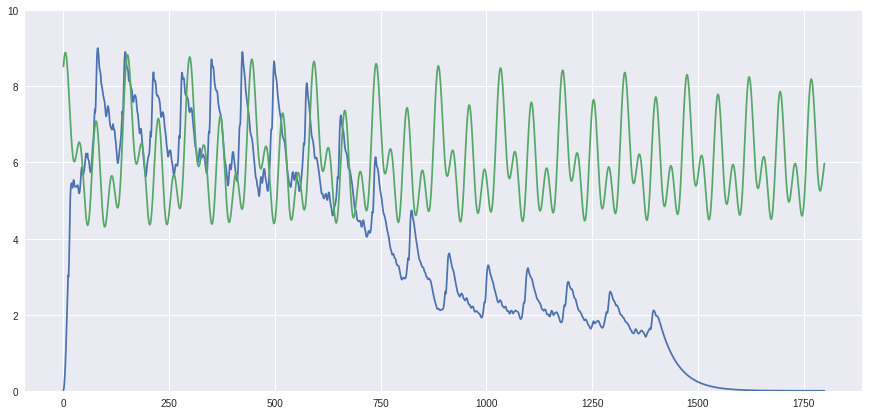

In [91]:
w.interact(tune,
          a=(-100, 100, 0.01), b=(-10, 10, 0.01), c=(0, np.pi), d=(0, 3000, 10),
          a2=(-100, 100, 0.01), b2=(-10, 10, 0.01), c2=(0, np.pi), d2=(0, 3000, 10),
          a3=(-100, 100, 0.01), b3=(-10, 10, 0.01), c3=(0, np.pi), d3=(0, 3000, 10),
          cst=(0, 10, 0.1))